## Shooting Method

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points on time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 29/08/2019
def f_euler(F, y0, ts, p = 0):
    ys = np.array([y0])  
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(ts,ys[-1], p)*h
        ys = np.vstack((ys, ynext))
        t = tnext
    return np.array(ys)

In [78]:
def rk_4(F, y0, ts, p = 0):
    h = ts[1] - ts[0]
    ys = np.array([y0])
    for tnext in ts[1:]:
        k1 = F(tnext, ys[-1])
        k2 = F(tnext + h/2, ys[-1]+h*k1/2)
        k3 = F(tnext + h/2, ys[-1] + h*k2/2)
        k4 = F(tnext + h, ys[-1] + h*k3)
        ynext = ys[-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        ys = np.vstack((ys, ynext))
    return ys

In [121]:
def sec(f,x,y, prec=1e-8, tol=1e-8, maxiter=200):
    if maxiter == 0:
        return None
    dx = f(x)*(x-y)/(f(x)-f(y))
    newx = x - dx
    if abs(f(newx)-f(x))>tol:
        if abs(dx) < prec:
            return newx
        else:
            return sec(f,y,newx, prec=prec,maxiter=maxiter-1)
    else:
        return newx

$$
\frac{\mathrm{d}^2u}{\mathrm{d}t^2} = \lambda u
$$

In [129]:
def shooting(F, y0, s, ts, m = 'f_euler', beta = 1, p = 0):
    if m == 'rk_4':
        def f(S):
            return rk_4(F, [y0[0],y0[1],S], ts)[-1][1]-beta
    else:
        def f(S):
            return f_euler(F, [y0[0],y0[1],S], ts)[-1][1]-beta
    
    return sec(f, s[0], s[1])

In [100]:
def F(t, x, p = 0):
    f, v, u = x
    return np.array([v, u, -f*u/2])

In [132]:
shooting(F, [0,0,0], (0,1), ts, m = 'f_euler')

0.33030753800926815

In [133]:
shooting(F, [0,0,0], (0,1), ts, m = 'rk_4')

0.33205733724755937

In [137]:
ts = np.arange(0,2,1/100)
iv = shooting(F, [0,0,0], (0,1), ts, m = 'rk_4')
sol = rk_4(F, [0,0,iv], ts)

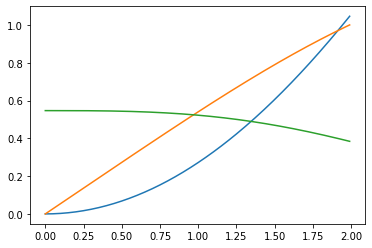

In [138]:
plt.plot(ts, sol)
plt.show()